# Projet 8


In [20]:
import CoolProp.CoolProp as CP
import pandas as pd
from CoolProp.Plots import PropertyPlot 
import matplotlib.pyplot as plt


### Constantes

In [2]:
fluid = "cyclopentane"
ma = 1 #débit d'air en kg/s
Ta1 = 350 + 273 #temperature d'entrée du fluide
Tf1 = 260+273 #température du fluide au point de fonctionnement 1
Pf1 = 2500000 #pression au point de fonctionnement 1
Tf2sv = 40 + 273 #température du fluide 
pinch = 15 #pincement
eta = 0.7 #rendement pompe/turbine
ref = 3 

ca = CP.PropsSI('Cpmass', 'T', Ta1, 'P', 1e5, 'Air') #capacité calorifique de l'air (varie avec la température mais on la considère constante ??)

## 1. Etude général du système

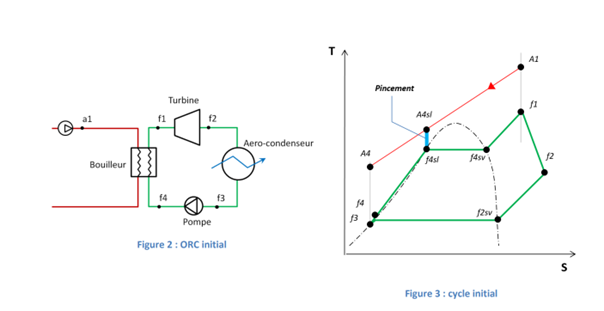

### $ \underline{Point\ \ de \ \ fonctionnement\ \ 1 \ \ :}$ 
Nous connaissons complétement l’Etat 1 du cycle, connaissant la pression et la température. 

$
P1=2500000 \\
T1=533 \\
h1= \\
s1= $

In [3]:
#point 1
hf1 = CP.PropsSI('H', 'P', Pf1, 'Q', 1, fluid) #je comprends pas entre liquide et gaz y a de l'entalpie créer et la y a pas de diff
sf1 = CP.PropsSI('S', 'P', Pf1, 'Q', 1, fluid)
print(f"Au point 1: T={Tf1}, P={Pf1}, h={hf1}, s={sf1}")

Au point 1: T=533, P=2500000, h=569238.3859757504, s=1341.6797309047993


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 2 \ \ :}$ 

Le fluide traverse la turbine pour atteindre le point f2. On utilise le rendement isentropique pour calculer le point théorique si la machine était réversible, puis on calcule la véritable valeur de l’enthalpie pour atteindre le point réel. 
(Rem : il nous manque pour l’instant une valeur pour
 calculer le point f_(2,is) et donc pour calculer le point f_2)

η=(h_2-h_1)/(h_(2,is)-h_1 ) 	donne 		h_2=η(h_(2,is)-h_1 )+h_1

Pour atteindre les valeurs du point f_(2,sv), sachant que l’on connait T_(f_(2,sv) ), il suffit de se placer à pression saturante.
P_(f_(2,sv) )=P_sat (T_(f_(2,sv) ))
Ceci nous permet aussi de calculer le point f_2. En effet, le point f_(2,sv) est un point théorique où la première goutte de liquide se forme dans le condenseur. En supposant la transformation 12 isobare,  on a donc P_(f_2 )=P_(f_(2,sv) ). Ainsi, on obtient le point f_(2,is) en suivant l’isentrope du point f_1 jusqu’à atteindre la pression P_(f_2 ).





In [4]:
Pf2 = CP.PropsSI('P', 'Q', 1, 'T', Tf2sv, fluid) #pression lors de la transformation 2->3 (isobare)

hf2isen = CP.PropsSI('H', 'S', sf1, 'P', Pf2, fluid) #on se base sur l'entropie du point 1 car transformation isentropique
hf2 = hf1 + eta*(hf2isen - hf1)

Tf2 = CP.PropsSI('T', 'P', Pf2, 'H',hf2, fluid)
sf2 = CP.PropsSI('S', 'P', Pf2, 'H',hf2, fluid)

print(f"Au point 2: T={Tf2}, P={Pf2}, h={hf2}, s={sf2}")

Au point 2: T=374.32843742025636, P=73593.5325017538, h=466014.1499853081, s=1464.6623758870803


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 2sv \ \ :}$ 



In [23]:
hf2sv = CP.PropsSI('H', 'P', Pf2, 'Q', 1, fluid) #c'est quoi le Q
sf2sv = CP.PropsSI('S', 'P', Pf2, 'Q', 1, fluid)
print(f"Au point 2sv: T={Tf2sv}, P={Pf2}h={hf2sv}, s={sf2sv}")

Au point 2sv: T=313, P=73593.5325017538h=378072.1602142715, s=1208.8707115690916


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 2sl \ \ :}$
La transformation entre le point f_(2,sv) et le point f_(2,sl) se fait via l’aérocondenseur ce qui se traduit par une transformation isobare et isotherme.
T_(f_(2,sl) )=T_(f_(2,sv) )


In [25]:
Tf2sl=Tf2sv
sf2sl = CP.PropsSI('S', 'P', Pf2, 'Q', 0, fluid)
hf2sl = CP.PropsSI('H', 'P', Pf2, 'Q', 0, fluid)
print(f"Au point 2sl: T={Tf2sv}, P={Pf2}, h={hf2sl}, s={sf2sl}")

Au point 2sl: T=313, P=73593.5325017538, h=-18012.70971353699, s=-56.576157210376394


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 3 \ \ :}$
Puis, on refroidit le liquide pour s'assurer que la totalité du fluide est sous phase liquide : on atteint ainsi le point f_3.
T_(f_3 )=T_(f_(2,sl) )-ref
De plus, le point 3 est à la pression de 2 car transformation isobare via l'aérocondenseur
P_(f_3 )=P_(f_2 )


In [7]:
Pf3 = Pf2
Tf3 = Tf2sv - 3
hf3 = CP.PropsSI('H', 'P', Pf3, 'T',Tf3, fluid)
sf3 = CP.PropsSI('S', 'P', Pf3, 'T',Tf3, fluid)
print(f"Au point 3: T={Tf3}, P={Pf3}, h={hf3}, s={sf3}")

Au point 3: T=310, P=73593.5325017538, h=-23654.141922900813, s=-74.68671359970935


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 4 \ \ :}$

La pompe amène ensuite le liquide du point 3 au point 4. De même que pour la turbine, on utilise le rendement isentropique de la turbine pour calculer le point théorique si la pompe était parfaite. De plus, pour passer du point 4 au point 1, le fluide passe dans un bouilleur : la transformation est donc isobare.
P_(f_4 )=P_(f_(4,sl) )=P_(f_(4,sv) )=P_(f_1 )
Pour calculer, les valeurs du point f_(4,is), on suit donc l’isentrope du point 3 jusqu’à atteindre la pression P_(f_1 ). On applique par la suite la définition du rendement isentropique pour calculer le point réel. 
h_4=1/η (h_(4,is)-h_3 )+h_3
P_(f_4 )=P_(f_(4,is) )=P_(f_1 )


In [8]:
Pf4 = Pf1

hf4isen = CP.PropsSI('H', 'S', sf3, 'P', Pf4, fluid)
hf4 = hf3 + (hf4isen - hf3)/eta

Tf4 = CP.PropsSI('T', 'P', Pf4, 'H', hf4, fluid)
sf4 = CP.PropsSI('S', 'P', Pf4, 'H',hf4, fluid)
print(f"Au point 4: T={Tf4}, P={Pf4}h={hf4}, s={sf4}")

Au point 4: T=311.52214035928495, P=2500000h=-18901.629487185128, s=-70.10437752522618


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 4sl \ \ :}$
Le point f_(4,sl) est un point à l’intérieur du bouilleur lorsque le liquide atteint son état de liquide saturant. 
P_(f_(4,sl) )=P_(f_1 )
T_(f_(4,sl) )=T_(liq,sat) (P_(f_(4,sl) ) )


In [9]:
Pf4sl = Pf1
Tf4sl = CP.PropsSI('T', 'Q', 0, 'P', Pf4sl, fluid)
sf4sl = CP.PropsSI('S', 'P', Pf4sl, 'Q',0, fluid)
hf4sl = CP.PropsSI('H', 'P', Pf4sl, 'Q',0, fluid)
print(f"Au point 4sl: T={Tf4sl}, P={Pf4sl}, h={hf4sl}, s={sf4sl}")

Au point 4sl: T=469.33228036620443, P=2500000, h=355394.52128325496, s=886.0454742420352


### $ \underline{Point\ \ de \ \ fonctionnement\ \ 4sv \ \ :}$

Le point f_(4,sv) est aussi un point à l’intérieur du bouilleur. Cette fois-ci le liquide est à l’état de pression saturante.
P_(f_(4,sv) )=P_(f_1 )
T_(f_(4,sv) )=T_(vap,sat) (P_(f_(4,sv) ) )


In [10]:
Pf4sv = Pf1
Tf4sv = CP.PropsSI('T', 'Q', 1, 'P', Pf4sv, fluid)
sf4sv = CP.PropsSI('S', 'P', Pf4sv, 'Q',1, fluid)
hf4sv = CP.PropsSI('H', 'P', Pf4sv, 'Q',1, fluid)
print(f"Au point 4sv: T={Tf4sv}, P={Pf4sv}, h={hf4sv}, s={sf4sv}")

Au point 4sv: T=469.33228036620443, P=2500000, h=569238.3859757504, s=1341.6797309047993


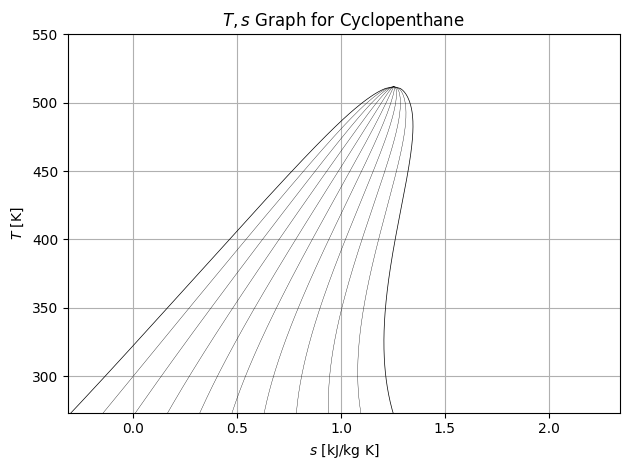

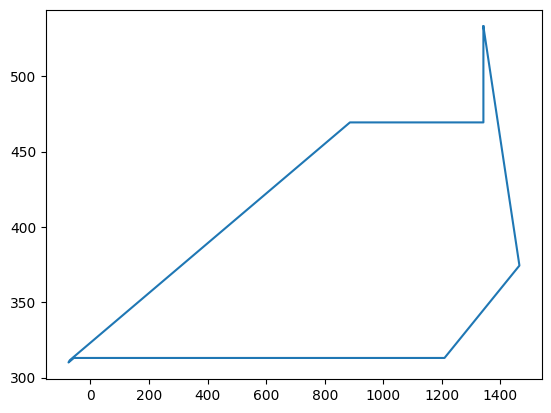

In [28]:
ts_plot = PropertyPlot(fluid, 'Ts', tp_limits='ORC')
ts_plot.calc_isolines(CP.iQ, num=11)
ts_plot.title(r'$T,s$ Graph for Cyclopenthane')
ts_plot.xlabel(r'$s$ [kJ/kg K]')
ts_plot.ylabel(r'$T$ [K]')
ts_plot.grid()
ts_plot.show()

s=[sf1,sf2,sf2sv,sf2sl,sf3,sf4,sf4sl,sf4sv,sf1]
T=[Tf1,Tf2,Tf2sv,Tf2sl, Tf3, Tf4, Tf4sl, Tf4sv,Tf1]
plot = plt.plot(s,T, markersize=2500)
